# Objective:
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

## Importing all the required libraries:

In [57]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

# Loading the dataset

In [39]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Observation:** We can see that the labels that we need to predict are in the form of text. We do label encoding to transform texts to numerical categorical values.

## Label Encoding:

In [40]:
le = preprocessing.LabelEncoder()
data["labels"]=le.fit_transform(data["Species"])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


**Observation:** These are the numerical categorical values for the Species label after one-hot encoding.

In [41]:
data['labels'].unique()

array([0, 1, 2], dtype=int64)

**Observation:** These are the unique class lables we need to predict for our model.

In [42]:
X=data.drop(['Id','Species','labels'],axis=1)
y=data['labels']

## Splitting the data to train and test.

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

## Train the model
We train the Decision Tree Classifier and see its f1-score for multiclass labels.

In [71]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
ytrain_preds=model.predict(X_train)
ytest_preds=model.predict(X_test)
#print(ytrain_preds)
train_score=f1_score(np.array(y_train),ytrain_preds,average="macro")
test_score=f1_score(np.array(y_test),ytest_preds,average="macro")
print(model)
print("The f1-score of training data is {}".format(train_score))
print("The f1-score of test data is {}".format(test_score))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The f1-score of training data is 1.0
The f1-score of test data is 0.9644444444444445


## Visualization of  our trained model.
We visualize the model in a flow diagramatic way to see how the model predicts the classes of iris flowers from the below structure

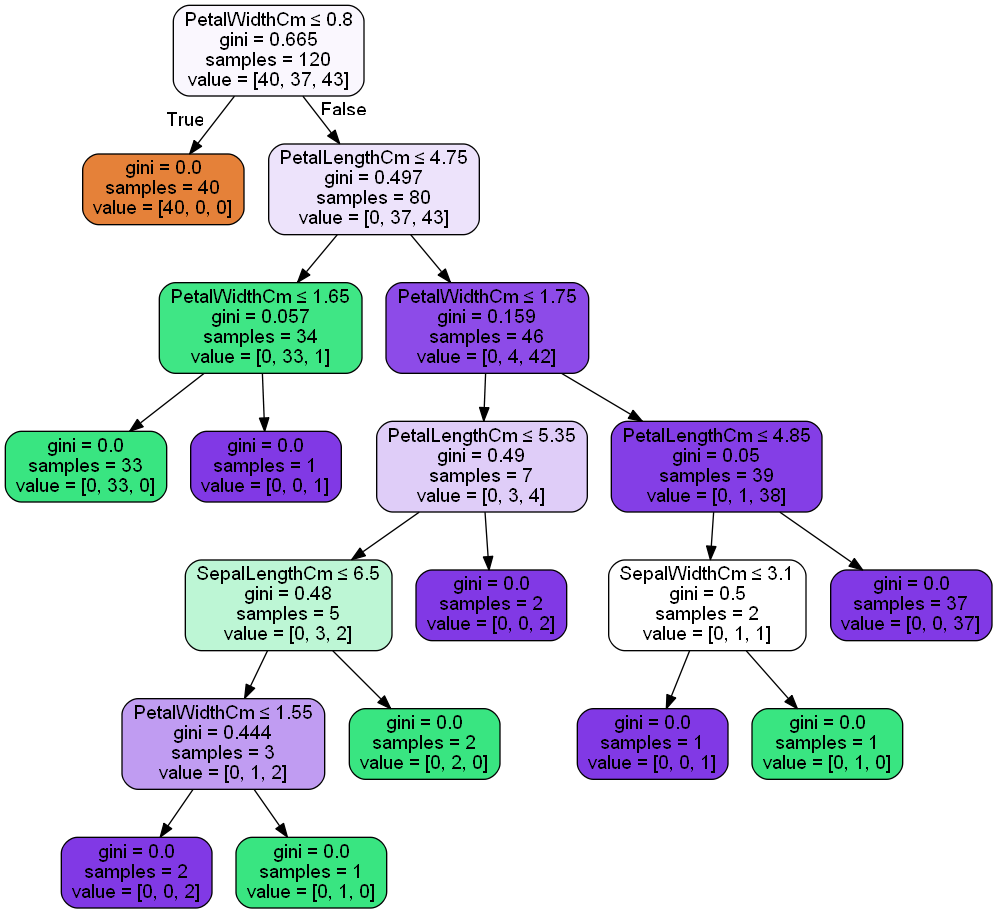

In [72]:

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=data.columns[1:-2],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Conclusion:

- This is how a decision tree wor